In [277]:
# Parse bed file and extract chrom, start, end positions of peaks
def parse_bed_file(peak_file):
    peaks = []
    with open(peak_file, 'r') as f:
        for line in f:
            if "#" in line:
                continue
            fields = line.strip().split('\t')
             # Change fields to 0, 1, 2 for BED file; 1, 2, 3 is for HOMER files (since I tested the functions using Lab 5 HOMER files)
            chrom = fields[1]
            start = int(fields[2])
            end = int(fields[3])
            peaks.append((chrom, start, end))
    return peaks

In [278]:
parse_bed_file('peaks.txt')

[('17', 35916928, 35917002),
 ('17', 36973463, 36973537),
 ('17', 57060668, 57060742),
 ('17', 35504026, 35504100),
 ('17', 45459121, 45459195),
 ('17', 57265117, 57265191),
 ('17', 83808182, 83808256),
 ('17', 87973887, 87973961),
 ('17', 85163102, 85163176),
 ('17', 45530608, 45530682),
 ('17', 87571775, 87571849),
 ('17', 56833584, 56833658),
 ('17', 46812509, 46812583),
 ('17', 36995629, 36995703),
 ('17', 46793174, 46793248),
 ('17', 89934138, 89934212),
 ('17', 17739476, 17739550),
 ('17', 31851941, 31852015),
 ('17', 28080666, 28080740),
 ('17', 32281271, 32281345),
 ('17', 35578367, 35578441),
 ('17', 43077230, 43077304),
 ('17', 45573287, 45573361),
 ('17', 56758217, 56758291),
 ('17', 66480469, 66480543),
 ('17', 66419526, 66419600),
 ('17', 37079261, 37079335),
 ('17', 10432972, 10433046),
 ('17', 29855368, 29855442),
 ('17', 29008102, 29008176),
 ('17', 45495557, 45495631),
 ('17', 70828295, 70828369),
 ('17', 31899122, 31899196),
 ('17', 37990772, 37990846),
 ('17', 560366

# Self-implementation (ignore)

In [3]:
# Self implementation of extracting sequence from genome fasta file based on peak coordinates; VERY SLOW
def extract_sequence(chrom, start, end, genome_fasta):
    sequence = ""
    target_chrom = False
    with open(genome_fasta, 'r') as f:
        for line in f:
            if len(sequence) >= end:
                break
            if ">" + chrom in line and not target_chrom:
                target_chrom = True
                continue
            if target_chrom:
                sequence += line.strip()
    return sequence[start:end]

In [4]:
foo = extract_sequence('Y', 100, 200, 'GRCm38.fa')    
foo

KeyboardInterrupt: 

# Function utilizing outside package

In [280]:
# Organizes the genome fasta file by chromosome so that we can later find sequences more quickly; MUCH FASTER
from Bio import SeqIO

def get_genome_info(fasta_file):
    genome_info = {}
    for record in SeqIO.parse(fasta_file, "fasta"):
        genome_info[record.id] = record.seq
    return genome_info

In [281]:
# Extract sequence from organized genome fasta file based on peak coordinates; FAST
def extract_sequence(chrom, start, end, genome_info):
    return str(genome_info[chrom][start:end])

In [282]:
# Combining all functions to get peak sequences
def get_peak_sequences(bed_file, genome_fasta_file):
    peaks = parse_bed_file(bed_file) # Get peak coordinates
    genome_info = get_genome_info(genome_fasta_file) # Organize genome fasta file for fast sequence extraction
    sequences = [] # Store peak sequences
    for peak in peaks: # Extract sequences for each peak
        chrom, start, end = peak # Unpack peak coordinates
        sequence = extract_sequence(chrom, start, end, genome_info) # Extract sequence
        sequences.append(sequence) # Store sequence
    return sequences # Return all sequences

In [283]:
import gibby
dna = get_peak_sequences('peaks.txt', 'GRCm38.fa')

In [523]:
foo = gibby.gibbs_sampler(dna, 20, 1000)


In [524]:
foo

['TGGCCGGGTATAAAAGACTC',
 'TCTCCCTTCCGGAGGAGCAA',
 'CGTCCGTCTGACCGCGAATA',
 'TGCCCTGGGGGCAGAGAAGA',
 'CCCGGGGGCTTGGGGTGTGT',
 'TCAAAGACTTGCGGGGAGTG',
 'TGACTGGAACAGAAGGATAC',
 'ACAATGGGGTTAAAGGCACA',
 'CAGTGCTGTGCCTGTCCCCA',
 'ATATTTAGCTGCCTTCTCAC',
 'TGTGGGATGGCAGGTAGCAA',
 'AGGTTAGGCCCAGGTGTAAT',
 'GCAATGTGGGTGTGTCCCAG',
 'AGACTGAATGAAAATGGAAA',
 'CTCTATAATGGCACACTTCC',
 'GGGTGTAGTCTCCAGAATAG',
 'GTAGCAGTATCTTGAAGAAG',
 'CAATACAAGTACCCCACCCC',
 'CGATGCTGTCACACACTCCA',
 'AAGGCCTGTGGCACCACACC',
 'CCAGAGCCTTCCCTCTAGTG',
 'CAGCTTTGGCTGCTTTTGAA',
 'GCCTTAAAGGAGTGGCTGCG',
 'ACTTGATCACTCAAACCCAC',
 'TCAGCAGGGCTGCTTTCCTT',
 'AGAGCCACACCCCAGGGGCT',
 'TGGTGACAAGCCCTGAAGTC',
 'TATAGTCATGGAAAGGAGAC',
 'ACCCTTGCTCCCCTGATGGA',
 'GTTACTTTTTCTTTTGAAAT',
 'TCATCTACCTCTGCAAAGCT',
 'GGACACACCTAGACACCCAA',
 'TATAGCTTTGTCCAAACTCA',
 'GGAAAGTGCTTATGATCTGC',
 'CTGCGCGTGCGCGCCCCCTG',
 'AACACGCCCTGCAAAAGGAC',
 'CACCCCTGCCCTCACCCCAC',
 'CGGGAGACACCAAGTCTGGG',
 'GGCTGGCAGAGCAGTCCCGG',
 'GTGGTCCCTGCTCATCTTTC',


In [409]:
import numpy as np
nucs = {"A": 0, "C": 1, "G": 2, "T": 3} # this might be helpful

def GetPFM(sequences):
    """ Compute the PFM for a set of sequences
    Parameters
    ----------
    sequences : list of str
        List of sequences (e.g. binding_sites)
    Returns
    -------
        pfm : 2d np.array
    Assumes all sequences have the same length
    """
    pfm = np.zeros((4, len(sequences[0])))
    # Fill in pfm below. Note: pfm[i,j] can be used to 
    # access and set the value for position j at nucleotide i
    # your code here
    col = 0
    for sequence in sequences:
        for i in range(len(sequence)):
            if sequence[i] == "A":
                pfm[nucs['A'], i] += 1
            if sequence[i] == "T":
                pfm[nucs['T'], i] += 1
            if sequence[i] == "C":
                pfm[nucs['C'], i] += 1
            if sequence[i] == "G":
                pfm[nucs['G'], i] += 1
    return pfm

In [358]:
def find_background_freq(sequences):
    total = 0
    frequencies = {"A": 0, "C": 0, "G": 0, "T": 0}
    for sequence in sequences:
        for nucleotide in sequence:
            frequencies[nucleotide] += 1
            total += 1
    return {nucleotide: round(frequency / total, 2) for nucleotide, frequency in frequencies.items()}

In [475]:
freq = find_background_freq(foo3)
freq

{'A': 0.23, 'C': 0.27, 'G': 0.28, 'T': 0.23}

In [525]:
pfm = GetPFM(foo)
pfm

array([[625., 685., 679., 729., 657., 669., 666., 689., 740., 663., 718.,
        644., 672., 710., 658., 680., 625., 687., 717., 652.],
       [828., 780., 816., 800., 792., 800., 911., 923., 824., 752., 824.,
        856., 884., 854., 874., 802., 902., 863., 818., 892.],
       [886., 851., 875., 809., 906., 897., 834., 800., 748., 916., 790.,
        837., 827., 789., 849., 833., 783., 826., 794., 808.],
       [681., 704., 650., 682., 665., 654., 609., 608., 708., 689., 688.,
        683., 637., 667., 639., 705., 710., 644., 691., 668.]])

In [526]:
pwm = GetPWM(foo)
pwm

array([[-0.27261648, -0.1403707 , -0.15306293, -0.05055715, -0.20058042,
        -0.17446798, -0.18095191, -0.13197083, -0.02895099, -0.18746512,
        -0.07249182, -0.22941266, -0.16801305, -0.08865641, -0.19838624,
        -0.15093979, -0.27261648, -0.13616465, -0.07450251, -0.21160166],
       [ 0.13315244,  0.04699687,  0.11209108,  0.08352228,  0.06902289,
         0.08352228,  0.27097114,  0.28985053,  0.12616609, -0.00574391,
         0.12616609,  0.1811319 ,  0.22756694,  0.17775721,  0.21115403,
         0.08712447,  0.25664767,  0.19288152,  0.11562273,  0.24056413],
       [ 0.23082723,  0.17268033,  0.21280375,  0.09966178,  0.26303122,
         0.24862832,  0.14356893,  0.08352228, -0.0134382 ,  0.2788676 ,
         0.06537516,  0.14874911,  0.13140902,  0.06354783,  0.16928579,
         0.14183806,  0.05253498,  0.12966349,  0.07266142,  0.0978774 ],
       [-0.14881977, -0.10089983, -0.21603384, -0.14670286, -0.18311972,
        -0.20718306, -0.31002984, -0.3124007 , -

In [493]:
def GetPWM(binding_sites, background_freqs=[0.25, 0.25, 0.25, 0.25]):
    """ Compute the PWM for a set of binding sites
    Parameters
    ----------
    binding_sites : list of str
        List of sequences 
    background_freqs: list of float
        Background frequency of A, C, G, T
    Returns
    -------
        pwm : 2d np.array
    Assumes all sequences have the same length
    """
    pwm = np.zeros((4, len(binding_sites[0])))
    pfm = GetPFM(binding_sites)
    pfm = pfm + 0.01 # Add pseudocount. Don't change this!
    # Compute pwm below
    # Note: np.sum(pfm[:,j]) will give the sum of counts for column j
    # Note: pfm[i,j]/np.sum(pfm[:,j]) gives p(i,j) (frequency of nucleotide i at position j)
    # your code here
    for i in range(len(pfm)):
        for j in range(len(pfm[i])):
                pwm[i,j] =  np.log2((pfm[i,j]/np.sum(pfm[:,j])) / background_freqs[i])
    return pwm

In [518]:
foo5 = foo3[0:100000]
pwm = GetPWM(foo5)
pwm

array([[-0.12778916, -0.15945116, -0.06048613, -0.12778916, -0.10912022,
        -0.10912022, -0.22270774, -0.22047968, -0.19400787, -0.05055715],
       [ 0.06354783,  0.11032201,  0.0853245 ,  0.04884527,  0.12791585,
         0.02274963,  0.14874911,  0.15734161,  0.24218058,  0.0451461 ],
       [ 0.14356893,  0.14702445,  0.0889222 ,  0.24701908,  0.13837008,
         0.1811319 ,  0.17098406,  0.09966178,  0.01141966,  0.16928579],
       [-0.09680713, -0.12361958, -0.12570287, -0.21160166, -0.18529078,
        -0.1153164 , -0.13826615, -0.06647648, -0.09680713, -0.18746512]])

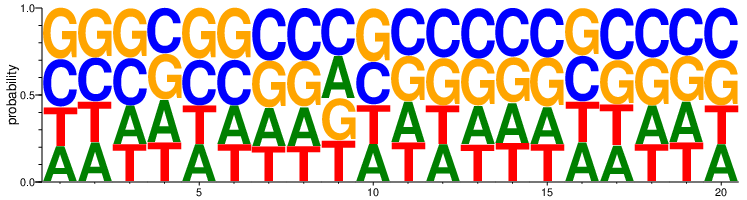

In [527]:
import seqlogo
## make seqlogo PWM object
seq_pwm = seqlogo.Pwm(pwm)
## Convert to ppm needed for plotting
seq_ppm = seqlogo.Ppm(seqlogo.pwm2ppm(seq_pwm))
seqlogo.seqlogo(seq_ppm, ic_scale = False, format = 'png', size = 'large')

In [470]:
def consensus_seq(best_motifs, k) -> str:
    """Returns the consensus sequence of the best motifs."""
    profile =  [{'A': 0, 'C': 0 , 'G': 0, 'T': 0} for _ in range(k)]
    for i in range(k):
        for motif in best_motifs:
            base = motif[i]
            profile[i][base] += 1
    consensus = ""
    for i in range(k):
        base = max(profile[i], key=profile[i].get)
        consensus += base
    return consensus

In [51]:
consensus_seq(foo3, 10)

'CCCGGGCCCC'

In [505]:
test_list = ["CGCCCCTCTCGGGGGTGTTCAGTAAGGGGGACGGCCA", "GGGCGAGGTATGTGTAAGTGGGGGGCCAAGGTGCCAG", "TAGTACCGAGAGGGGGCCGAAAGAAGTATACAGGCGT", "TAGATCAAGTGGGGGTTCAGGTGCACGTCGGTGAACC", "AATCCACCAGCTCCACGGGGGGTGCAATGTTGGCCTA"]
foo4 = gibby.gibbs_sampler(test_list, 15, 100)


In [506]:
freq2 = find_background_freq(test_list)

In [507]:
pfm = GetPFM(foo4)
pfm

array([[0., 2., 4., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 5., 3.],
       [4., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 2., 4., 0., 0.],
       [0., 1., 0., 4., 2., 5., 5., 5., 4., 5., 1., 1., 1., 0., 2.],
       [1., 1., 0., 0., 2., 0., 0., 0., 1., 0., 3., 2., 0., 0., 0.]])

In [508]:
def GetPWM2(binding_sites, background_freqs=[0.25, 0.25, 0.25, 0.25]):
    """ Compute the PWM for a set of binding sites
    Parameters
    ----------
    binding_sites : list of str
        List of sequences 
    background_freqs: list of float
        Background frequency of A, C, G, T
    Returns
    -------
        pwm : 2d np.array
    Assumes all sequences have the same length
    """
    pwm = np.zeros((4, len(binding_sites[0])))
    pfm = GetPFM(binding_sites)
    pfm = pfm + 0.01 # Add pseudocount. Don't change this!
    # Compute pwm below
    # Note: np.sum(pfm[:,j]) will give the sum of counts for column j
    # Note: pfm[i,j]/np.sum(pfm[:,j]) gives p(i,j) (frequency of nucleotide i at position j)
    # your code here
    for i in range(len(pfm)):
        for j in range(len(pfm[i])):
            if i == 0:
                pwm[i,j] =  np.log2((pfm[i,j]/np.sum(pfm[:,j])) / 0.25)
            if i == 1:
                pwm[i,j] =  np.log2((pfm[i,j]/np.sum(pfm[:,j])) / 0.25)
            if i == 2:
                pwm[i,j] =  np.log2((pfm[i,j]/np.sum(pfm[:,j])) / 0.25)
            if i == 3:
                pwm[i,j] =  np.log2((pfm[i,j]/np.sum(pfm[:,j])) / 0.25)
    return pwm

In [509]:
pwm = GetPWM2(foo4)
pwm

array([[-6.97727992,  0.67377177,  1.6701785 , -6.97727992, -0.31906844,
        -6.97727992, -6.97727992, -6.97727992, -6.97727992, -6.97727992,
        -6.97727992, -6.97727992, -6.97727992,  1.99138687,  1.25633975],
       [ 1.6701785 , -0.31906844, -0.31906844, -0.31906844, -6.97727992,
        -6.97727992, -6.97727992, -6.97727992, -6.97727992, -6.97727992,
        -0.31906844,  0.67377177,  1.6701785 , -6.97727992, -6.97727992],
       [-6.97727992, -0.31906844, -6.97727992,  1.6701785 ,  0.67377177,
         1.99138687,  1.99138687,  1.99138687,  1.6701785 ,  1.99138687,
        -0.31906844, -0.31906844, -0.31906844, -6.97727992,  0.67377177],
       [-0.31906844, -0.31906844, -6.97727992, -6.97727992,  0.67377177,
        -6.97727992, -6.97727992, -6.97727992, -0.31906844, -6.97727992,
         1.25633975,  0.67377177, -6.97727992, -6.97727992, -6.97727992]])

In [510]:
import pandas as pd
df = pd.DataFrame(pwm, index=["A", "C", "G", "T"])
df2 = df.T
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
A,-6.977280,0.673772,1.670179,-6.977280,-0.319068,-6.977280,-6.977280,-6.977280,-6.977280,-6.977280,-6.977280,-6.977280,-6.977280,1.991387,1.256340
C,1.670179,-0.319068,-0.319068,-0.319068,-6.977280,-6.977280,-6.977280,-6.977280,-6.977280,-6.977280,-0.319068,0.673772,1.670179,-6.977280,-6.977280
G,-6.977280,-0.319068,-6.977280,1.670179,0.673772,1.991387,1.991387,1.991387,1.670179,1.991387,-0.319068,-0.319068,-0.319068,-6.977280,0.673772
T,-0.319068,-0.319068,-6.977280,-6.977280,0.673772,-6.977280,-6.977280,-6.977280,-0.319068,-6.977280,1.256340,0.673772,-6.977280,-6.977280,-6.977280


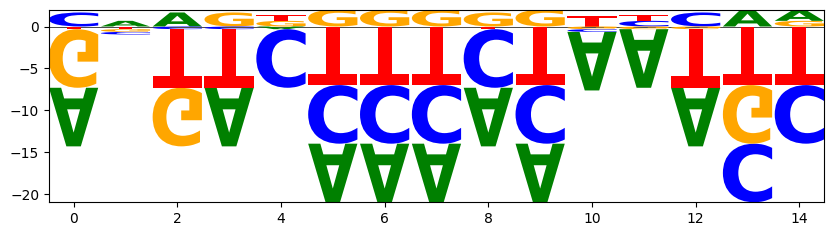

In [511]:
import logomaker as lm
lm.Logo(df2)

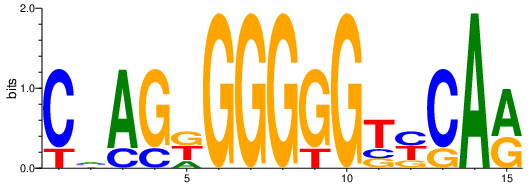

In [512]:
import seqlogo
## make seqlogo PWM object
seq_pwm = seqlogo.Pwm(pwm)
## Convert to ppm needed for plotting
seq_ppm = seqlogo.Ppm(seqlogo.pwm2ppm(seq_pwm))
seqlogo.seqlogo(seq_ppm, ic_scale = True, format = 'png', size = 'medium')